In [7]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [12]:
df = pd.read_csv('winequality-red.csv', sep =',')

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
extra = df[df.duplicated()]
extra.shape

(240, 12)

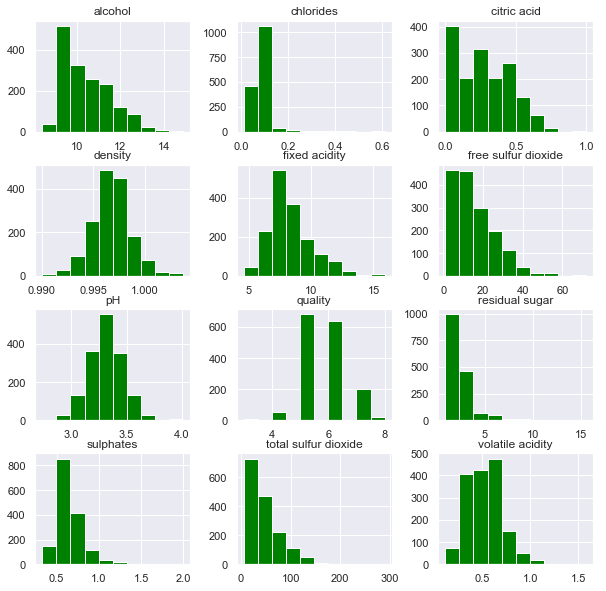

In [17]:
sns.set()
df.hist(figsize=(10,10), color='green')
plt.show()

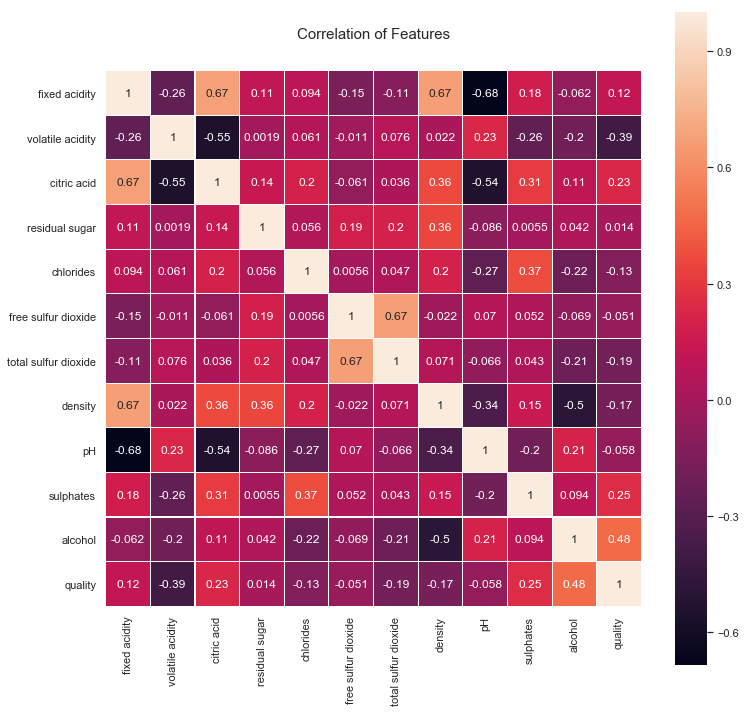

In [23]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


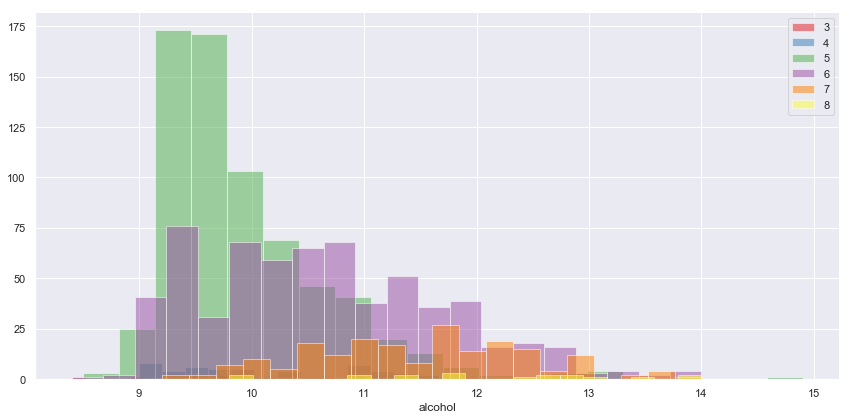

In [10]:
g = sns.FacetGrid(df,hue='quality',palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'alcohol',bins=20,alpha=0.5)
plt.legend()

In [11]:
from matplotlib.collections import EllipseCollection
def plot_corr_ellipses(df, ax=None, **kwargs):

    M = np.array(df)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(df, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(df.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(df.index)

    return ec

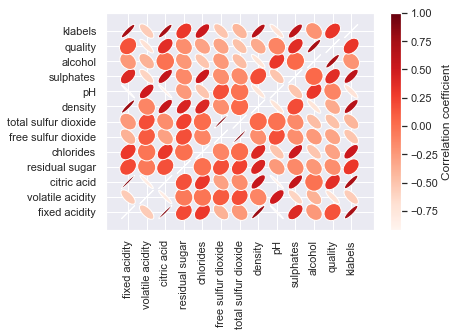

In [31]:
df = df.corr()
fig, ax = plt.subplots(1, 1)
m = plot_corr_ellipses(df, ax=ax, cmap='Reds')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)

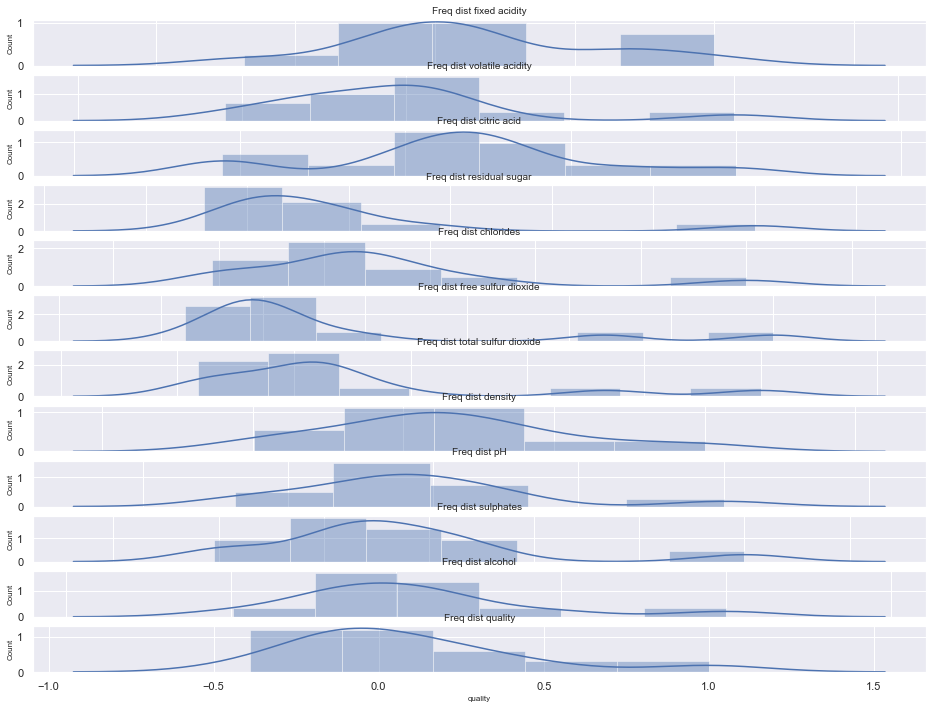

In [13]:
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [14]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.132295,-0.023026,0.159438,0.169744,0.118685,0.134586,0.131157,0.149664,-0.060599,0.166919,0.055919,0.091987
std,0.460298,0.392134,0.437610,0.286498,0.330876,0.344622,0.355559,0.415475,0.432671,0.321947,0.386245,0.368674
min,-0.682978,-0.552496,-0.552496,-0.085652,-0.265026,-0.153794,-0.205654,-0.496180,-0.682978,-0.260987,-0.496180,-0.390558
25%,-0.123335,-0.257345,0.011405,0.011681,-0.028055,-0.053237,-0.078166,-0.060189,-0.284194,0.033592,-0.203130,-0.140410
50%,0.104241,-0.004293,0.173700,0.085193,0.058454,-0.002471,0.045174,0.109888,-0.076073,0.121051,-0.009796,-0.018462
75%,0.304266,0.065091,0.325814,0.191044,0.201430,0.099545,0.108109,0.357699,0.104191,0.266740,0.133836,0.232629
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
print(df.shape)

(12, 12)


In [16]:
print(df.nunique())

fixed acidity           12
volatile acidity        12
citric acid             12
residual sugar          12
chlorides               12
free sulfur dioxide     12
total sulfur dioxide    12
density                 12
pH                      12
sulphates               12
alcohol                 12
quality                 12
dtype: int64


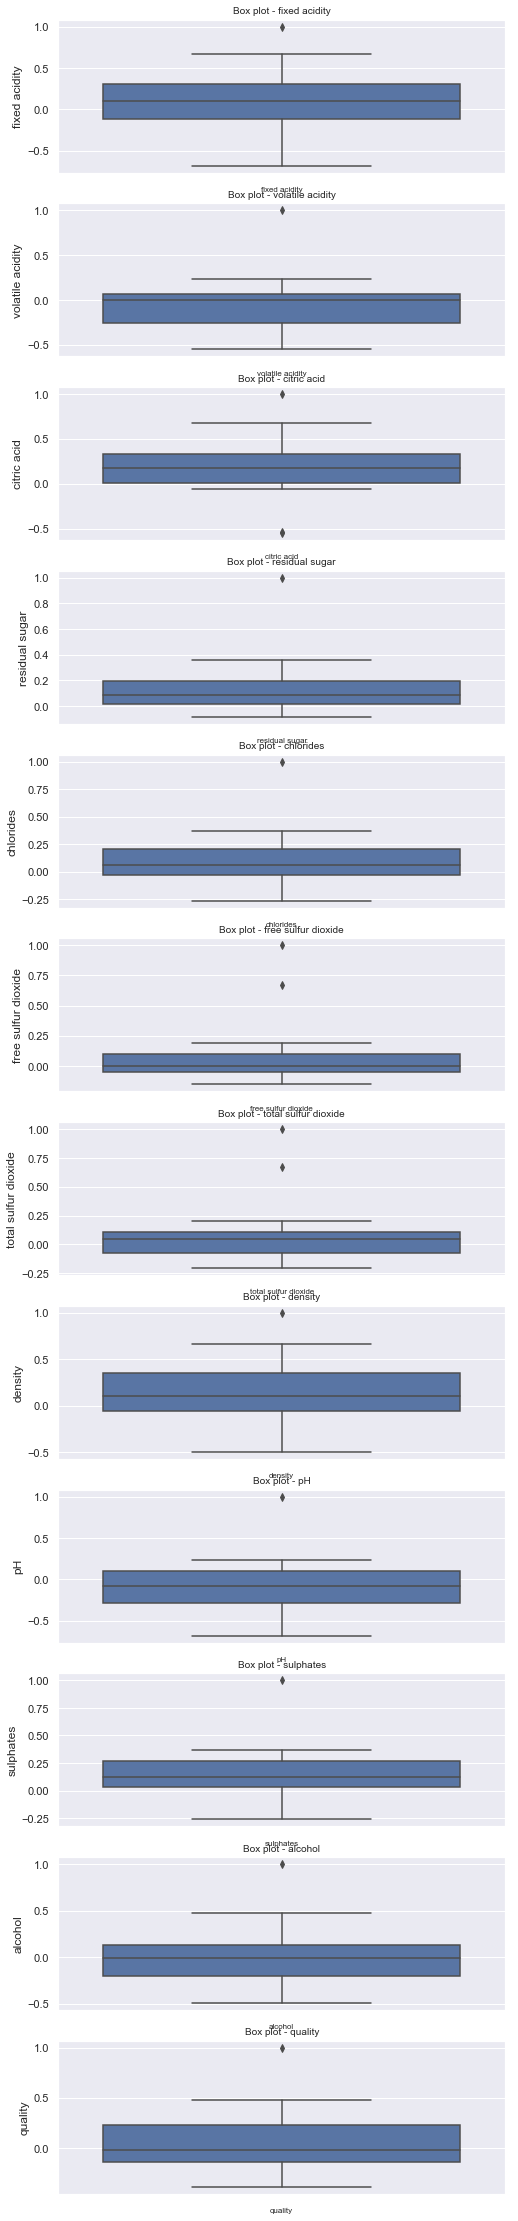

In [17]:
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

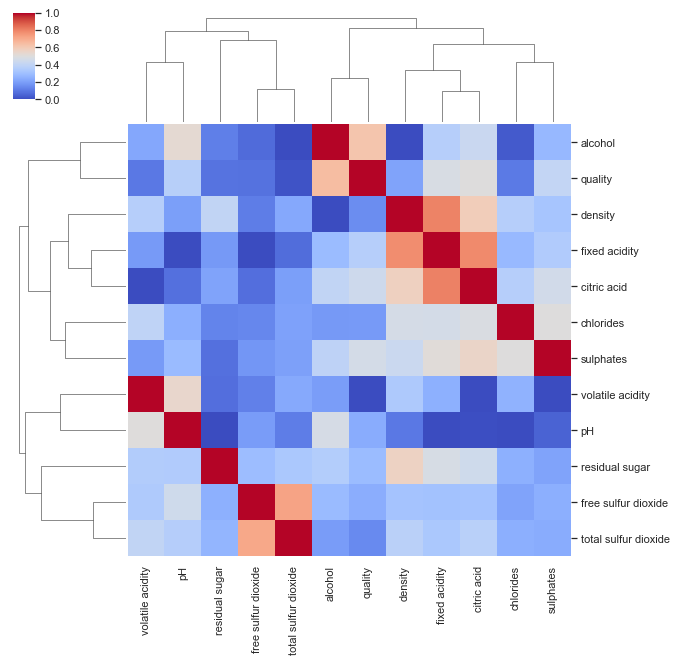

In [18]:
sns.clustermap(df, cmap='coolwarm', standard_scale=1)
        

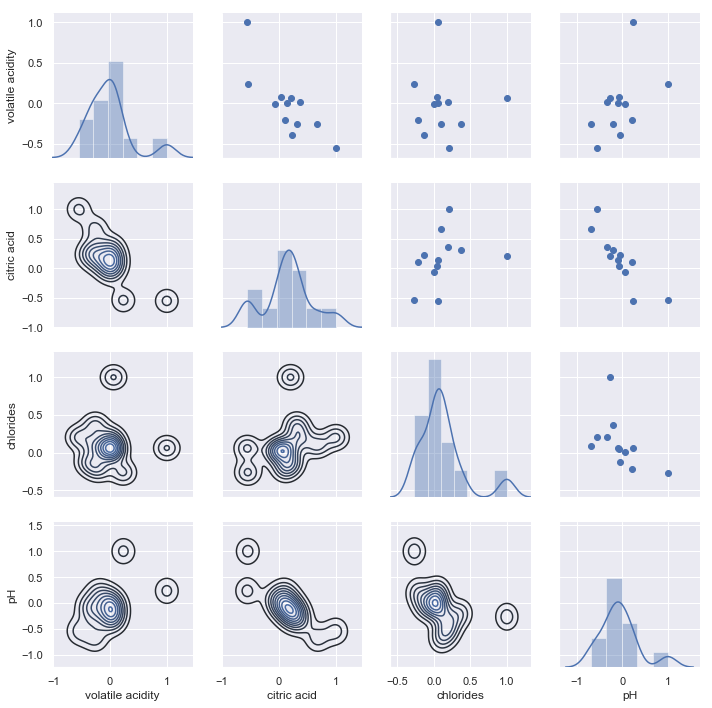

In [19]:
g = sns.PairGrid(df[['volatile acidity', 'citric acid', 'chlorides', 'pH']])
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [20]:
x_columns = 12
x = df.iloc[:, 0:x_columns].values

In [21]:
x_ = df.drop('quality', axis = 1)

In [22]:
x_.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141


In [23]:
from sklearn.cluster import KMeans
km2 = KMeans(n_clusters=2, random_state=0)
km2.fit(x)
y=km2.predict(x) # y=model.fit_predict(x)
#from sklearn.metrics import silhouette_score

In [24]:
#kmin = 2
#kmax = 12
#sil_scores = []

In [25]:
#df['klabels'] = km.labels_
#for k in range(kmin,kmax):
#    km = KMeans(n_clusters=k, n_init=13).fit(x)
#    sil_scores.append(silhouette_score(km.labels_))

In [26]:
centers = km2.cluster_centers_
centers

array([[-0.2535506 ,  0.21972309, -0.20198834,  0.06968355, -0.07438126,
         0.33162635,  0.29439759, -0.15330585,  0.28889055, -0.05388703,
         0.14565644, -0.04157584],
       [ 0.40789856, -0.19641845,  0.41759903,  0.24121508,  0.25658913,
        -0.00615793,  0.01455656,  0.36607105, -0.31023417,  0.32463811,
        -0.0081784 ,  0.18738958]])

In [27]:
df['klabels'] = km2.labels_
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,klabels
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,1
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,1
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,1
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,1


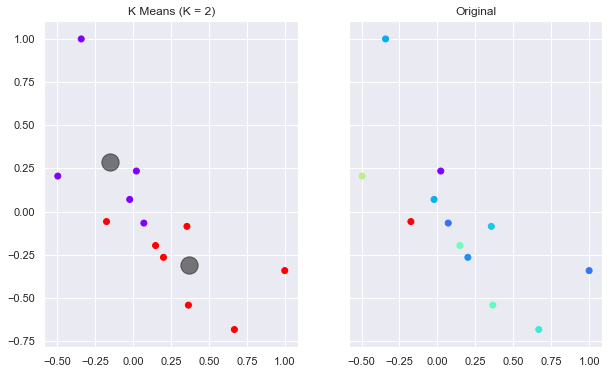

In [28]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

# For fitted with kmeans 
ax1.set_title('K Means (K = 2)')
ax1.scatter(x = df['density'], y = df['pH'], 
            c = df['klabels'], cmap='rainbow')
ax1.scatter(x=centers[:, 7], y=centers[:, 8],
            c='black',s=300, alpha=0.5);

# For original data 
ax2.set_title("Original")
ax2.scatter(x = df['density'], y = df['pH'], 
            c = df['quality'], cmap='rainbow')

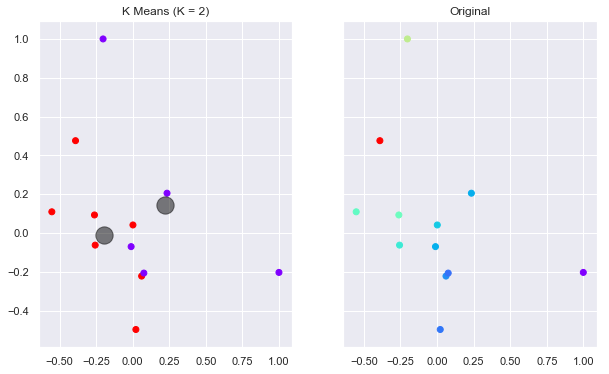

In [29]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

# For fitted with kmeans 
ax1.set_title('K Means (K = 2)')
ax1.scatter(x = df['volatile acidity'], y = df['alcohol'], 
            c = df['klabels'], cmap='rainbow')
ax1.scatter(x=centers[:, 1], y=centers[:, 10],
            c='black',s=300, alpha=0.5);

# For original data 
ax2.set_title("Original")
ax2.scatter(x = df['volatile acidity'], y = df['alcohol'], 
            c = df['quality'], cmap='rainbow')

In [30]:
# sum_square will be key,value pair for the elbow plot!
sum_square = {}
# Let's test for K from 1 to 10, we can use range() function here! remember?
for k in range(1, 20):
    km2 = KMeans(n_clusters=k).fit(x)
    # .inertia: Computing Sum of Squared Distances of samples to their closest cluster center.
    sum_square[k] = km2.inertia_ 

ValueError: n_samples=12 should be >= n_clusters=13

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method ='ward'))
#import matplotlib.pyplot as plt
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')